In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display

In [8]:
music_data = pd.read_csv('train.csv')
music_data.head(5)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,pop.00072.5.wav,66149,0.464264,0.079744,0.228116,0.007791,2156.231325,333455.342337,2295.327890,301528.295866,...,36.512493,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688,pop
1,jazz.00038.9.wav,66149,0.254604,0.090115,0.075960,0.002236,1439.715643,68955.697954,1532.279764,78968.523547,...,29.887444,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949,jazz
2,disco.00055.3.wav,66149,0.488070,0.065943,0.119709,0.001558,2049.831819,132030.817465,2043.472368,71699.726714,...,29.158789,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089,disco
3,rock.00025.9.wav,66149,0.440747,0.071972,0.108535,0.001491,2237.056815,129862.001264,2070.706749,62747.206984,...,33.833458,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505,rock
4,jazz.00013.4.wav,66149,0.369718,0.090648,0.052010,0.000124,1775.591113,66645.168399,2351.155395,51753.800714,...,48.042686,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722,jazz


In [9]:
null_value_counts = music_data.isnull().sum()

# Display the count of null values for each attribute
print(null_value_counts)

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

<Figure size 1200x800 with 0 Axes>

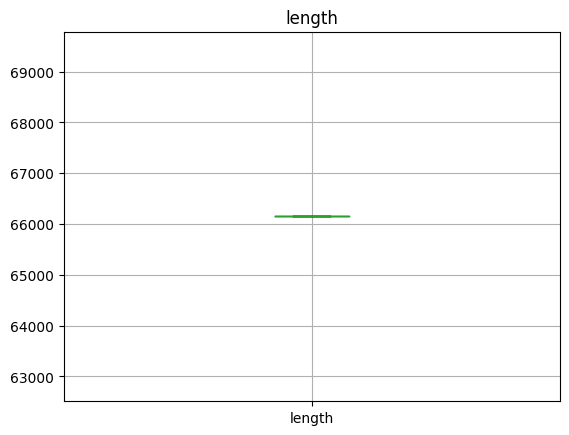

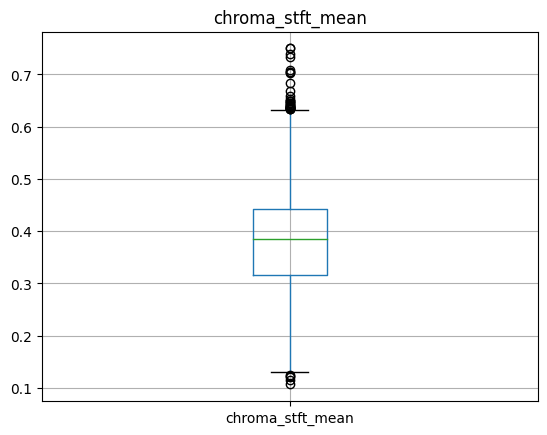

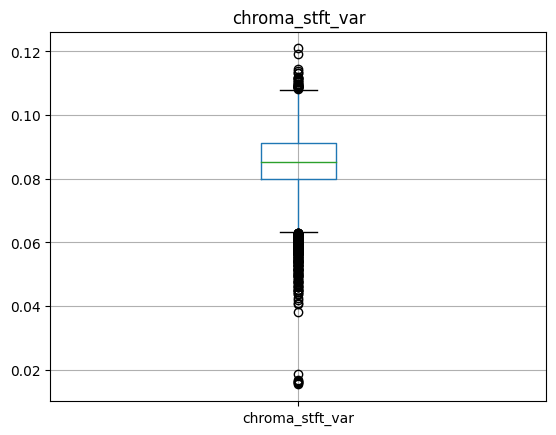

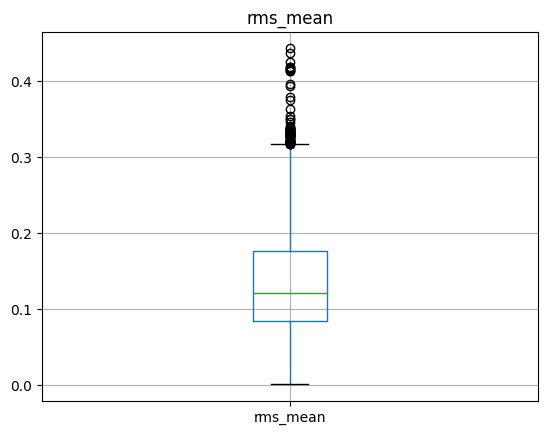

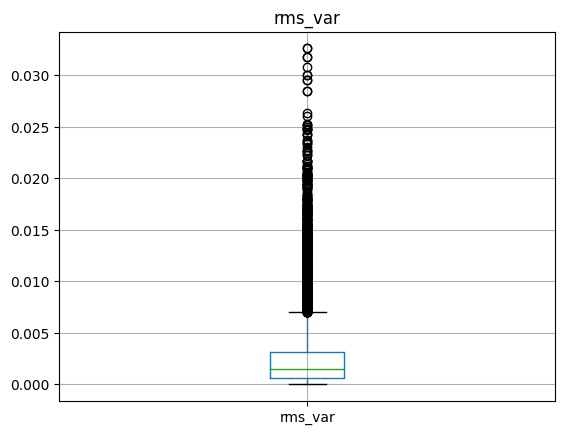

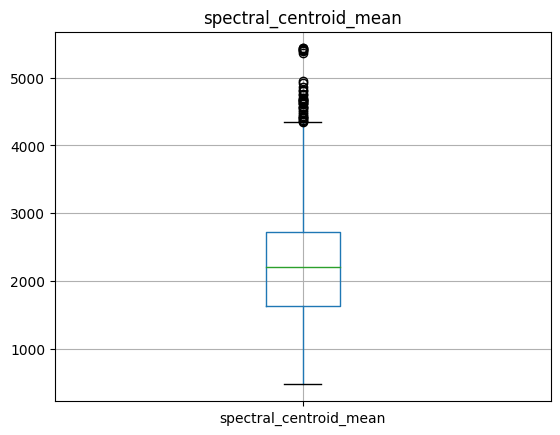

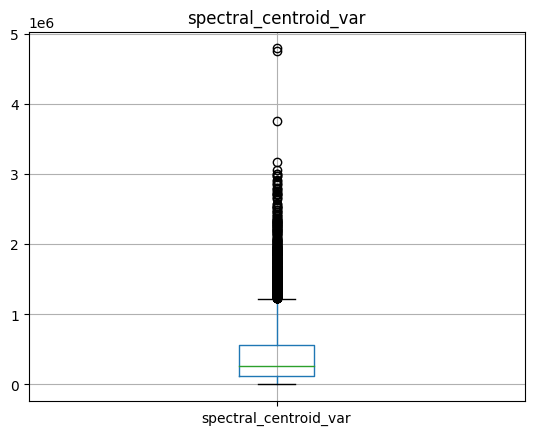

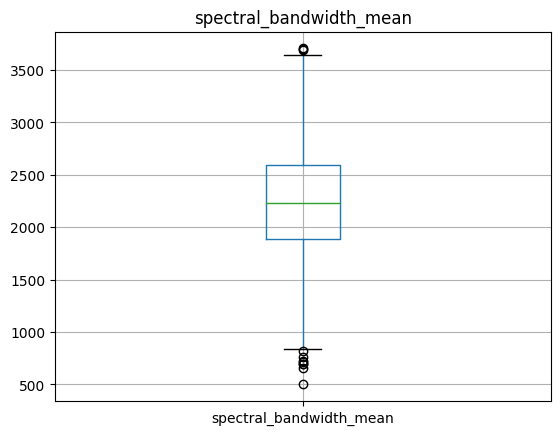

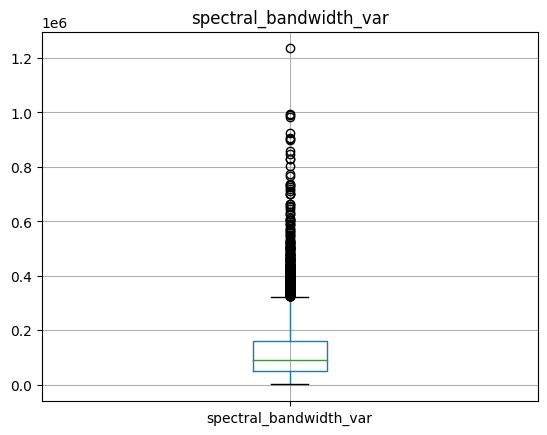

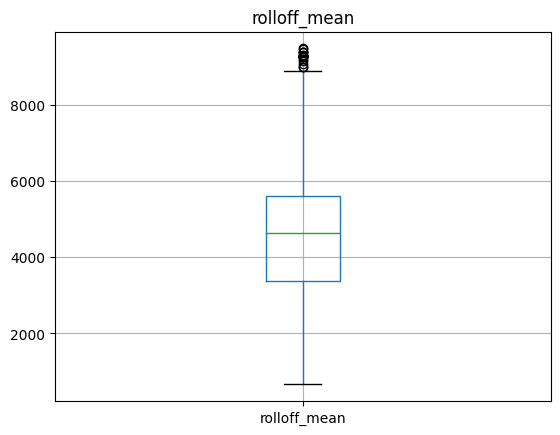

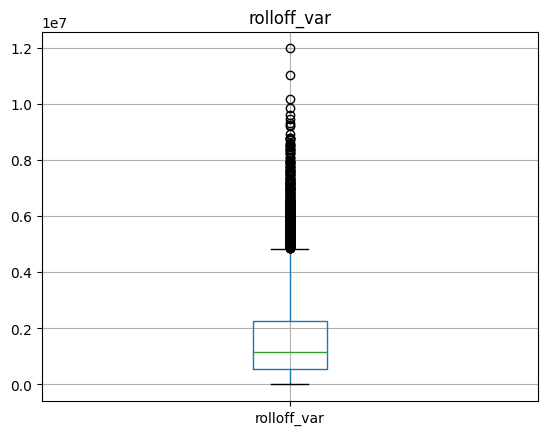

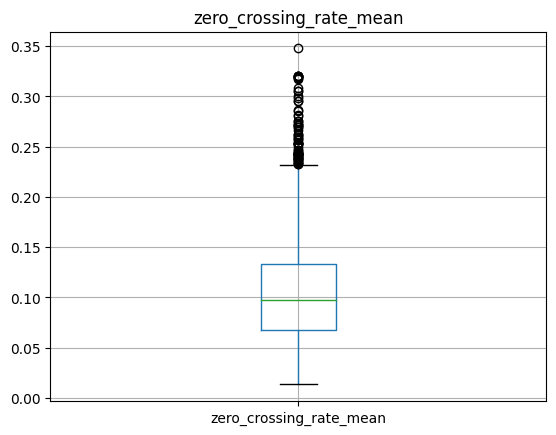

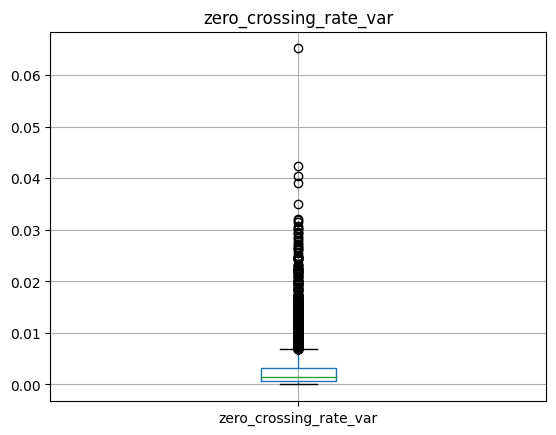

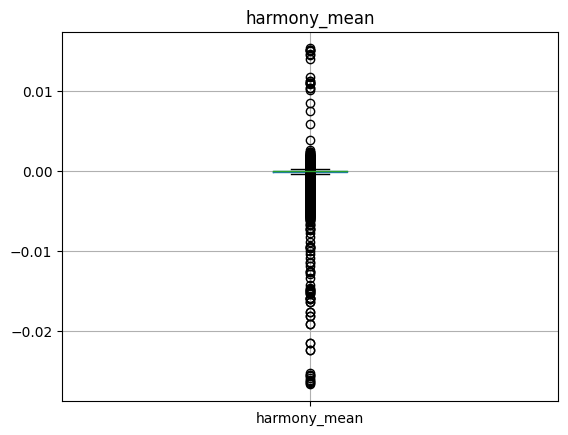

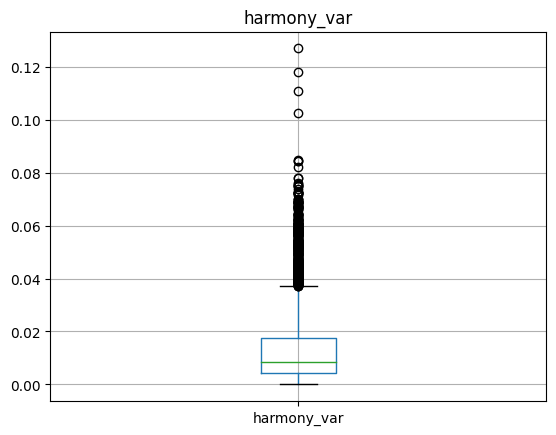

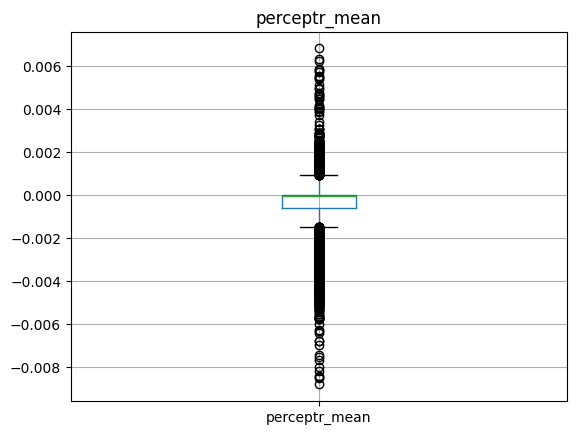

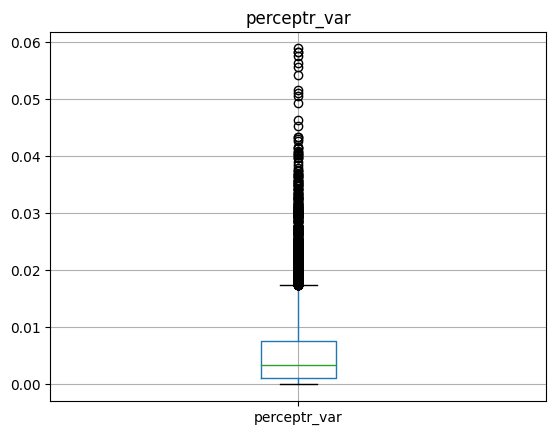

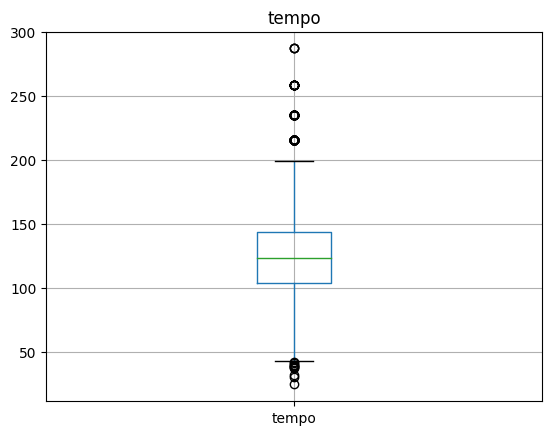

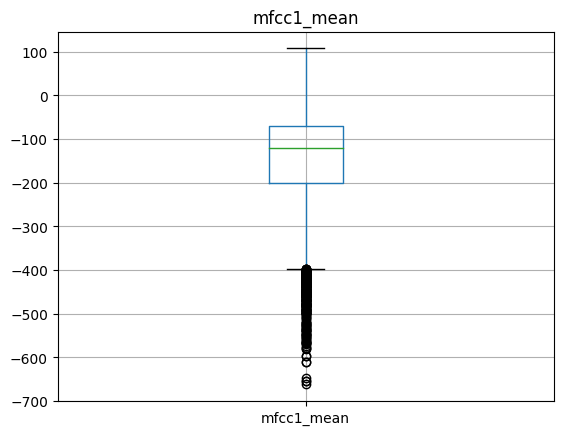

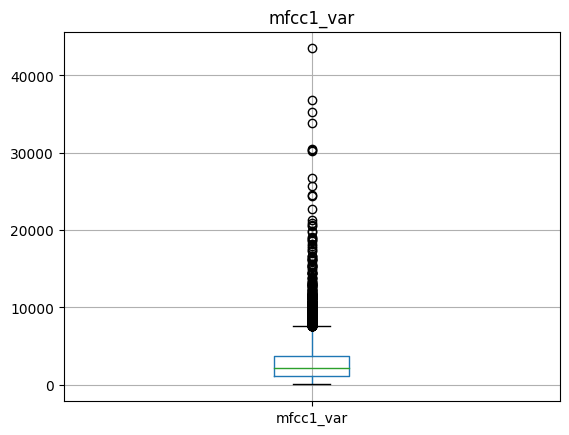

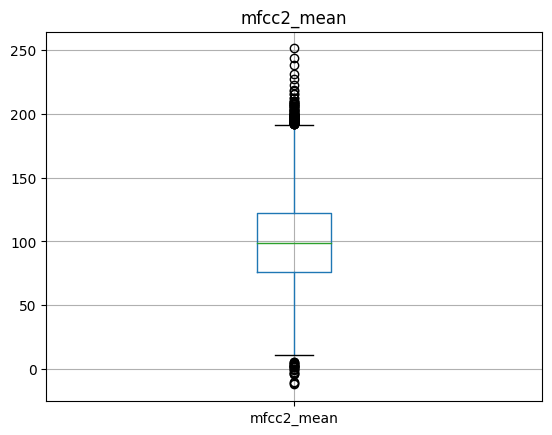

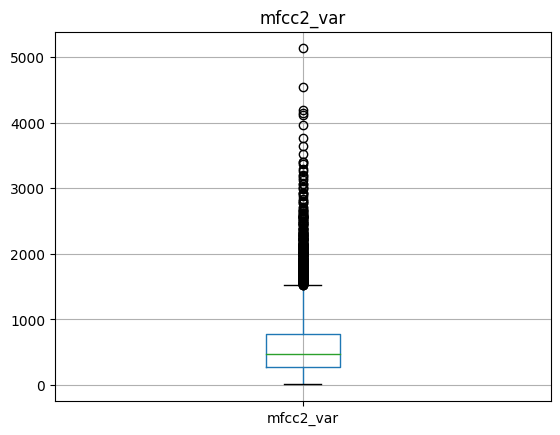

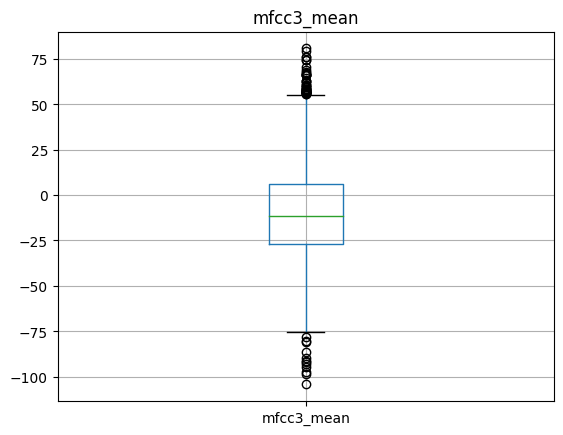

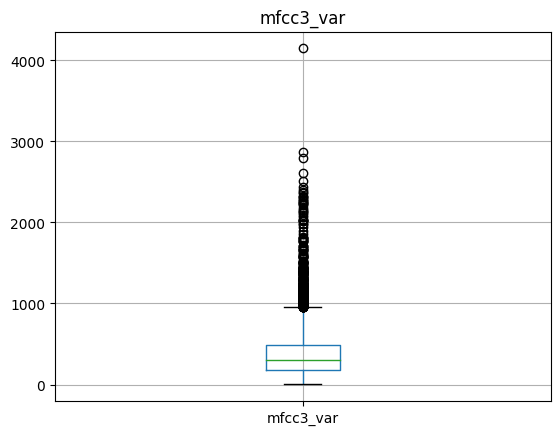

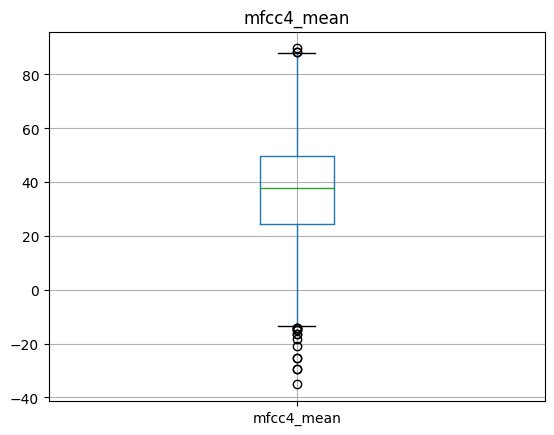

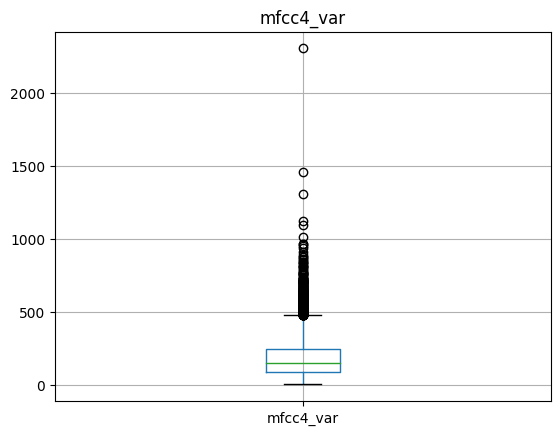

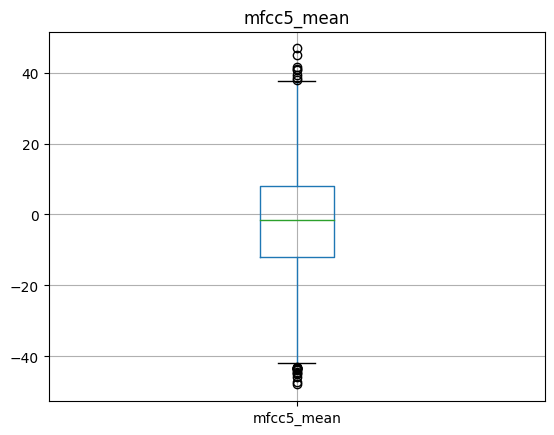

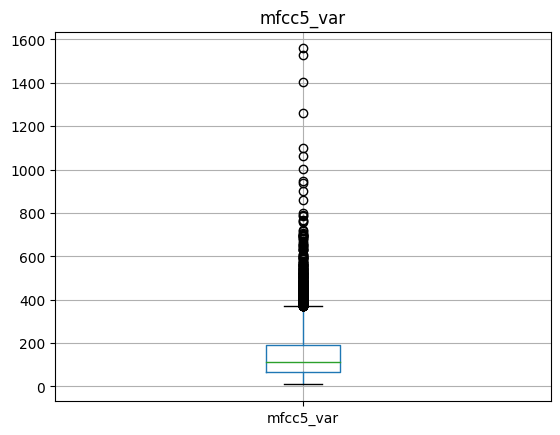

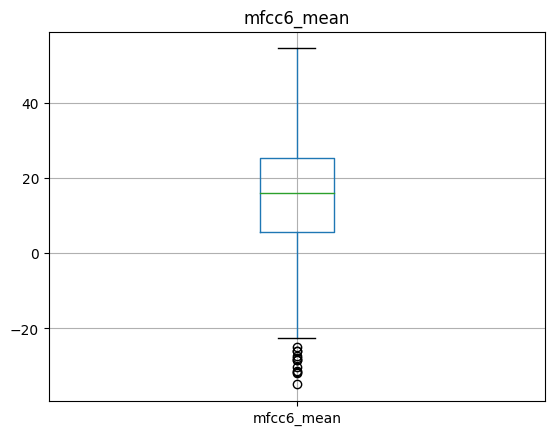

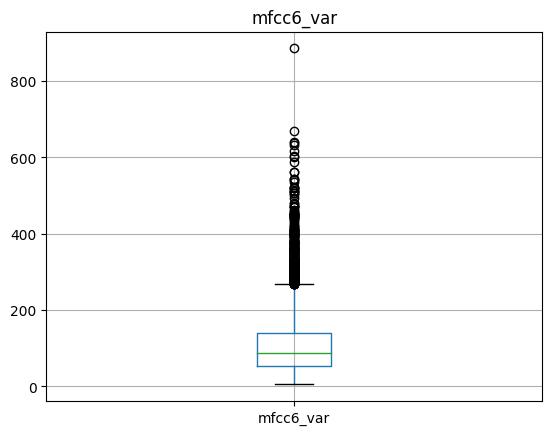

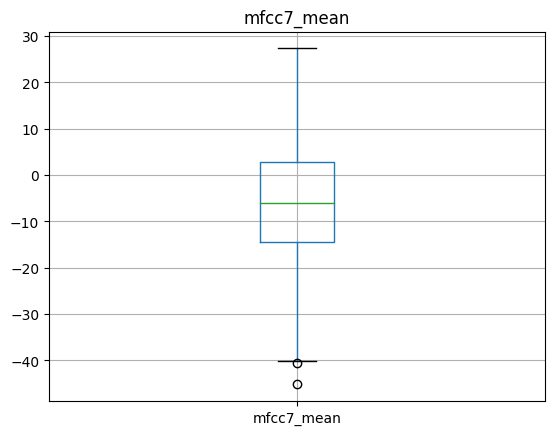

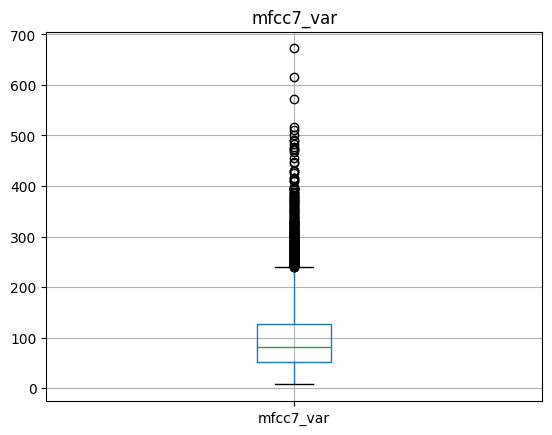

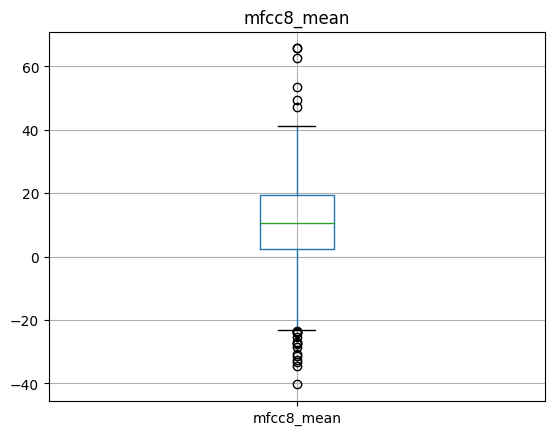

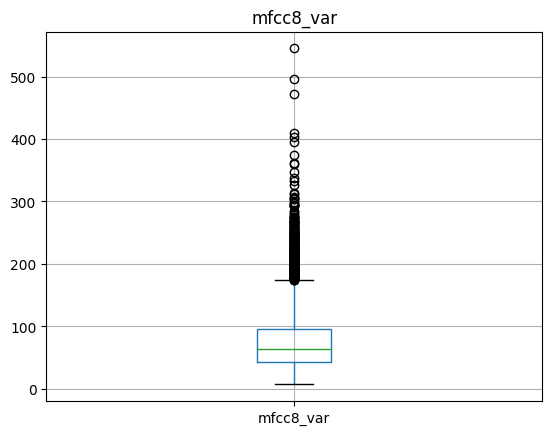

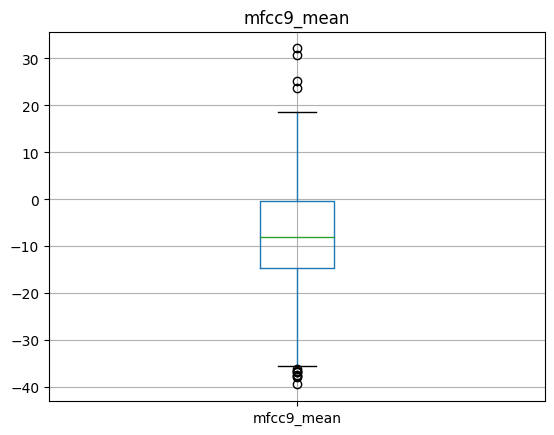

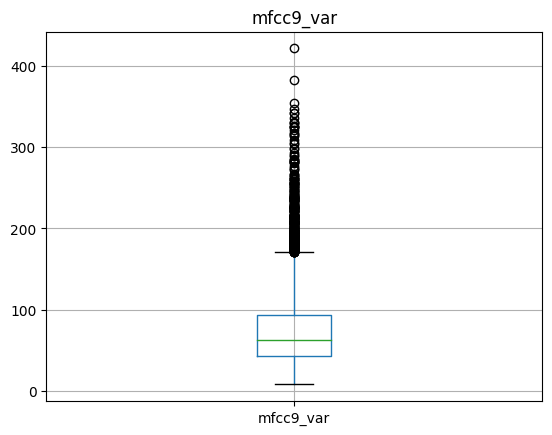

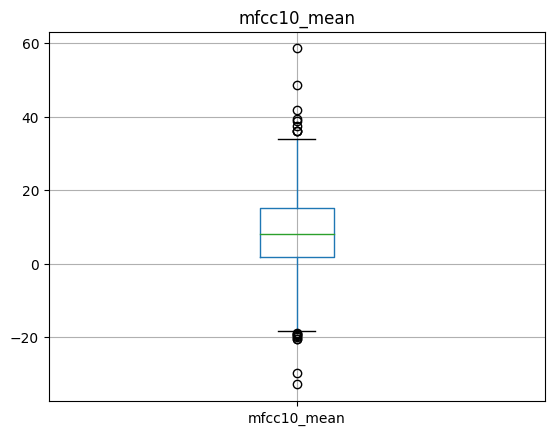

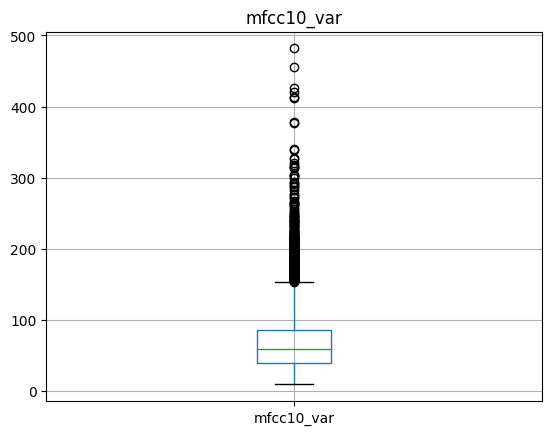

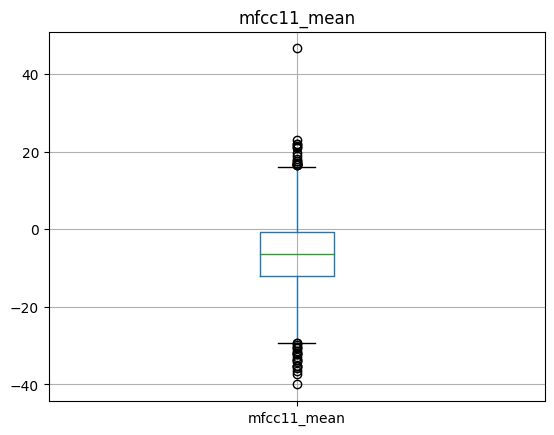

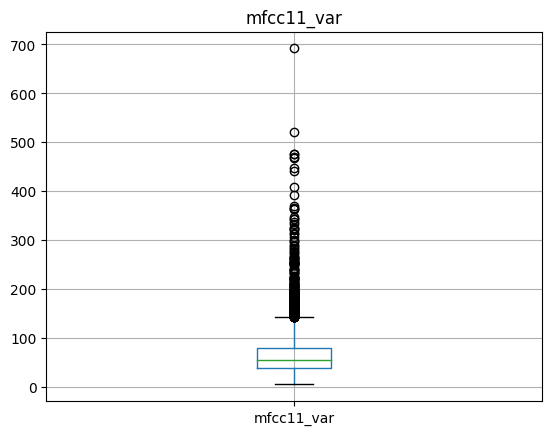

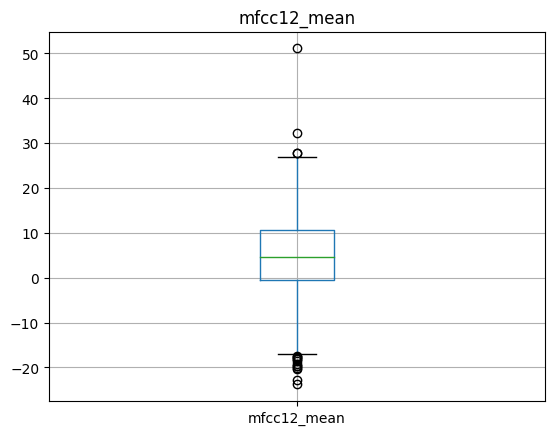

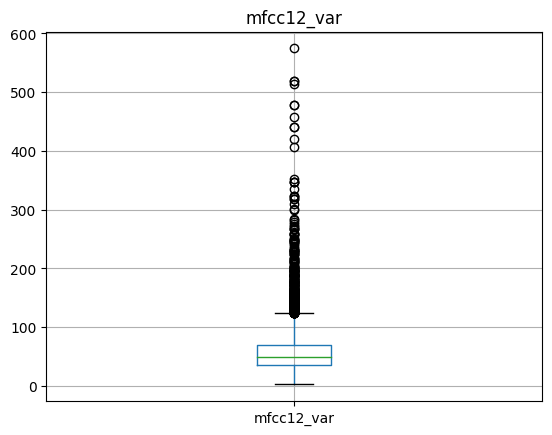

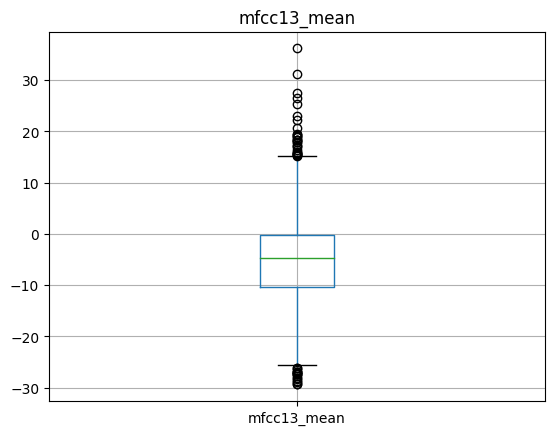

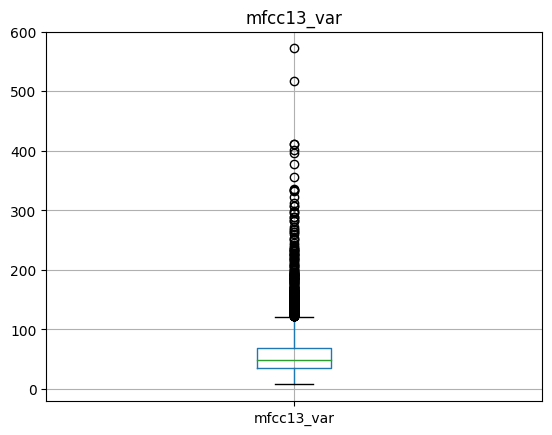

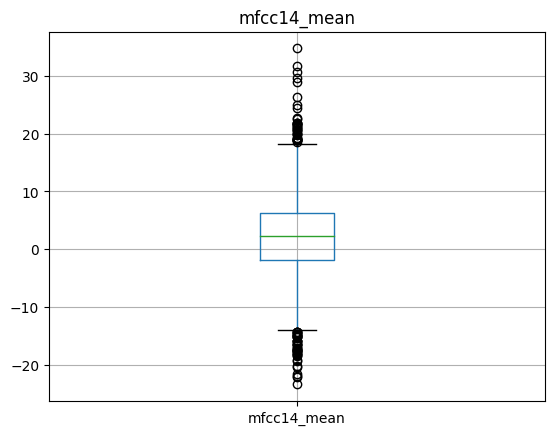

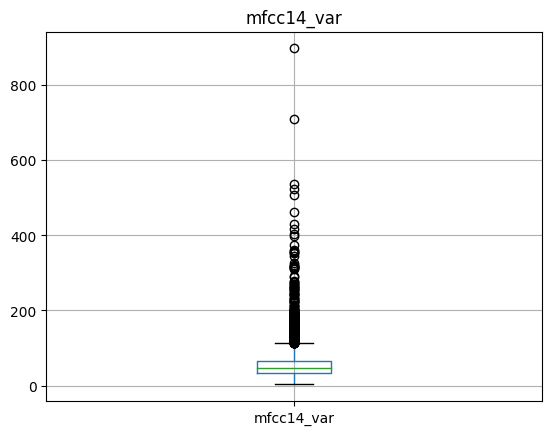

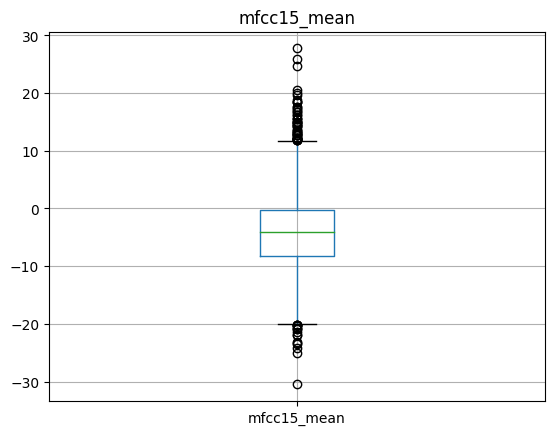

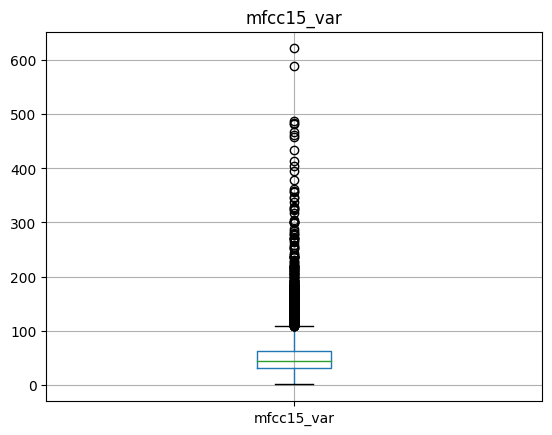

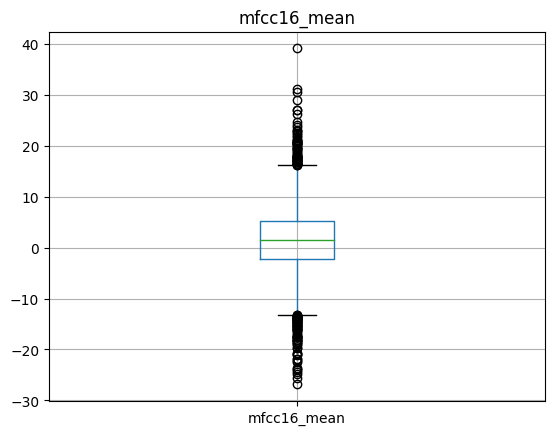

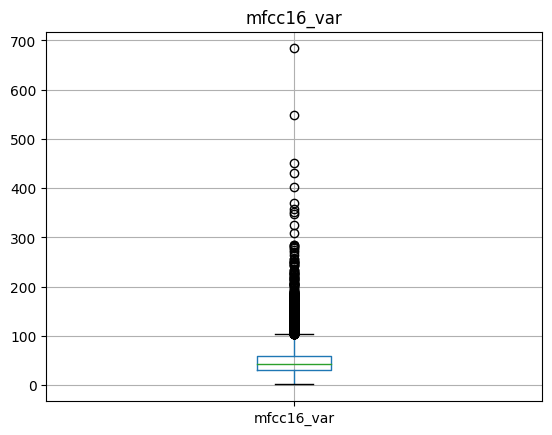

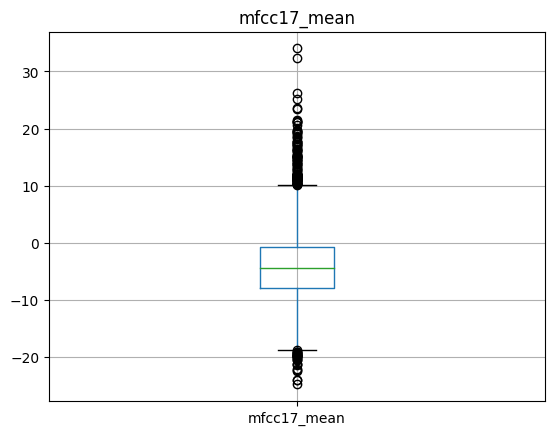

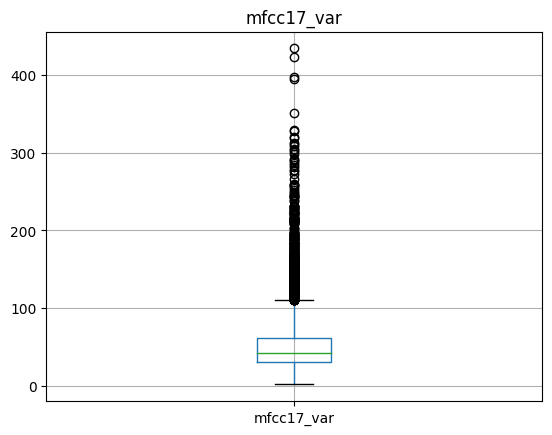

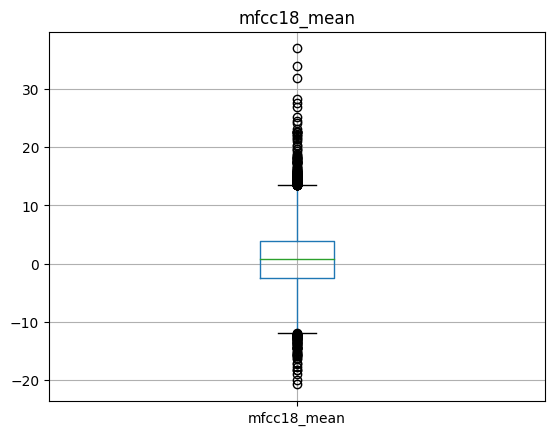

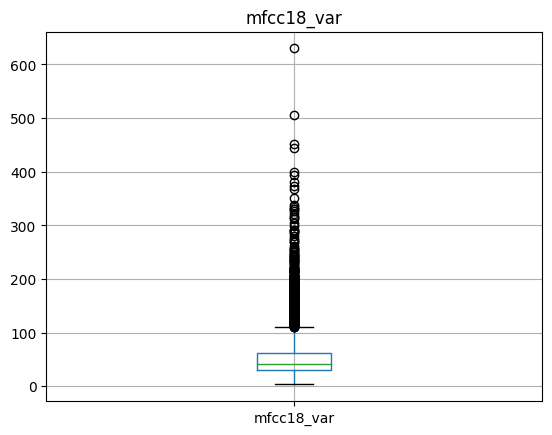

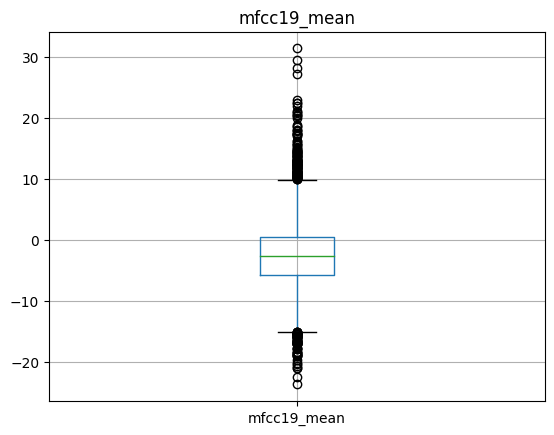

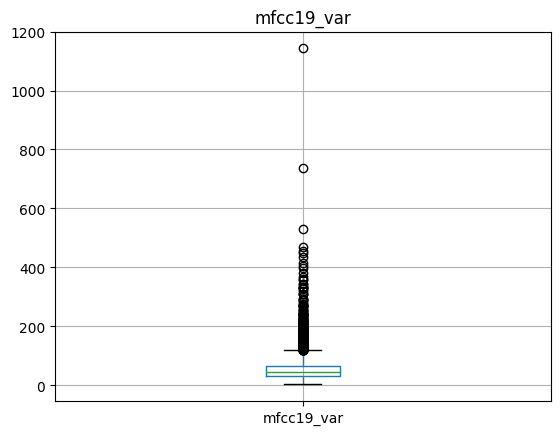

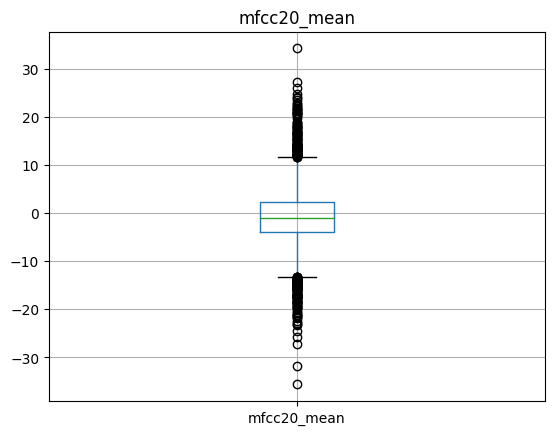

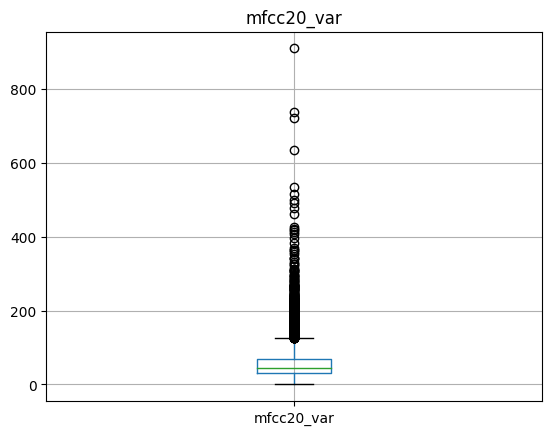

In [12]:

df=music_data
# Create box plots for each attribute
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
for column in music_data.columns[1:-1]:
  plt.figure()
  df.boxplot([column])
  plt.title(column)
  plt.show()







In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler



# Select the numeric attributes to be normalized (excluding the first and 'label')
numeric_attributes = df.columns[2:-1]  # Excludes the first and last columns

# Min-Max scaling
minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df[numeric_attributes]), columns=numeric_attributes)

# Z-score (standardization) scaling
std_scaler = StandardScaler()
df_std = pd.DataFrame(std_scaler.fit_transform(df[numeric_attributes]), columns=numeric_attributes)

# Combine the normalized attributes with the 'label' column
df_normalized_minmax = pd.concat([df[['filename']],df[['length']], df_minmax, df['label']], axis=1)
df_normalized_std = pd.concat([df[['filename']],df[['length']], df_std, df['label']], axis=1)

# Display the normalized DataFrames
print("Min-Max Scaled Data:")
print(df_normalized_minmax.head())

print("\nStandardized Data:")
print(df_normalized_std.head(20))


Min-Max Scaled Data:
            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0    pop.00072.5.wav   66149          0.555995         0.609732  0.514393   
1   jazz.00038.9.wav   66149          0.229611         0.707917  0.169847   
2  disco.00055.3.wav   66149          0.593055         0.479058  0.268914   
3   rock.00025.9.wav   66149          0.519385         0.536141  0.243610   
4   jazz.00013.4.wav   66149          0.408812         0.712968  0.115613   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.238862                0.339427               0.069397   
1  0.068562                0.194963               0.014216   
2  0.047761                0.317975               0.027375   
3  0.045709                0.355724               0.026923   
4  0.003809                0.262682               0.013734   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0                 0.559730                0.243399  ...    0.051548   
1

In [14]:
music_data['label'].value_counts()

pop          900
jazz         900
blues        900
reggae       900
metal        900
disco        899
rock         898
country      898
hiphop       898
classical    898
Name: label, dtype: int64

In [30]:
import pandas as pd


genre_counts = music_data['label'].value_counts()


print(genre_counts)

7    900
5    900
0    900
8    900
6    900
3    899
9    898
2    898
4    898
1    898
Name: label, dtype: int64


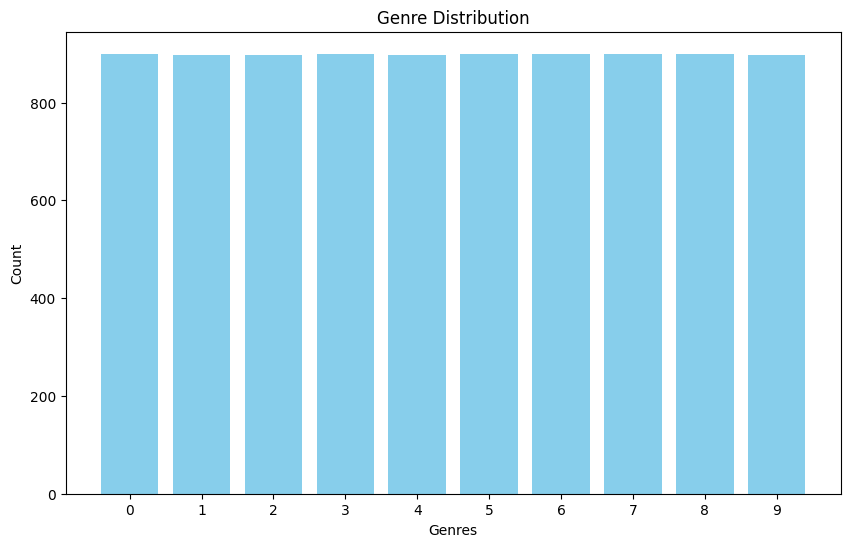

In [31]:
genre_counts = {7: 900, 5: 900, 0: 900, 8: 900, 6: 900, 3: 899, 9: 898, 2: 898, 4: 898, 1: 898}

# Extract genres and counts
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(genres, counts, color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.xticks(genres)  # Use the genres as x-axis labels

plt.show()

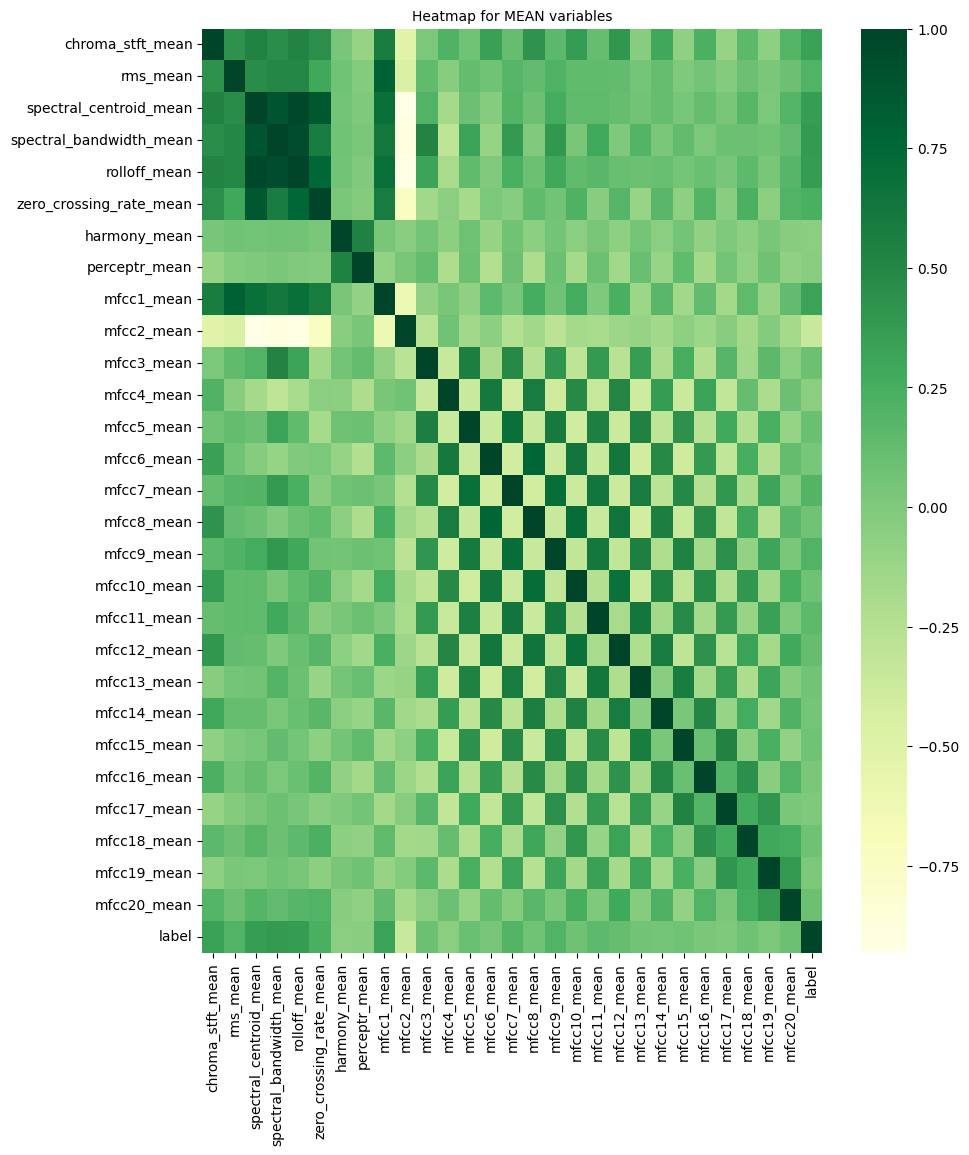

In [27]:

from sklearn.preprocessing import LabelEncoder
label_encoder =LabelEncoder()
music_data['label'] = label_encoder.fit_transform(music_data['label'])


spike_cols = [col for col in music_data.columns if 'mean' in col]
spike_cols.append('label')

f, ax = plt.subplots(figsize=(10, 12));

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(music_data[spike_cols].corr(), cmap='YlGn')

plt.title('Heatmap for MEAN variables', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

<ipython-input-19-814833bb327b>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(music_data[spike_cols].corr(), cmap='YlGn')


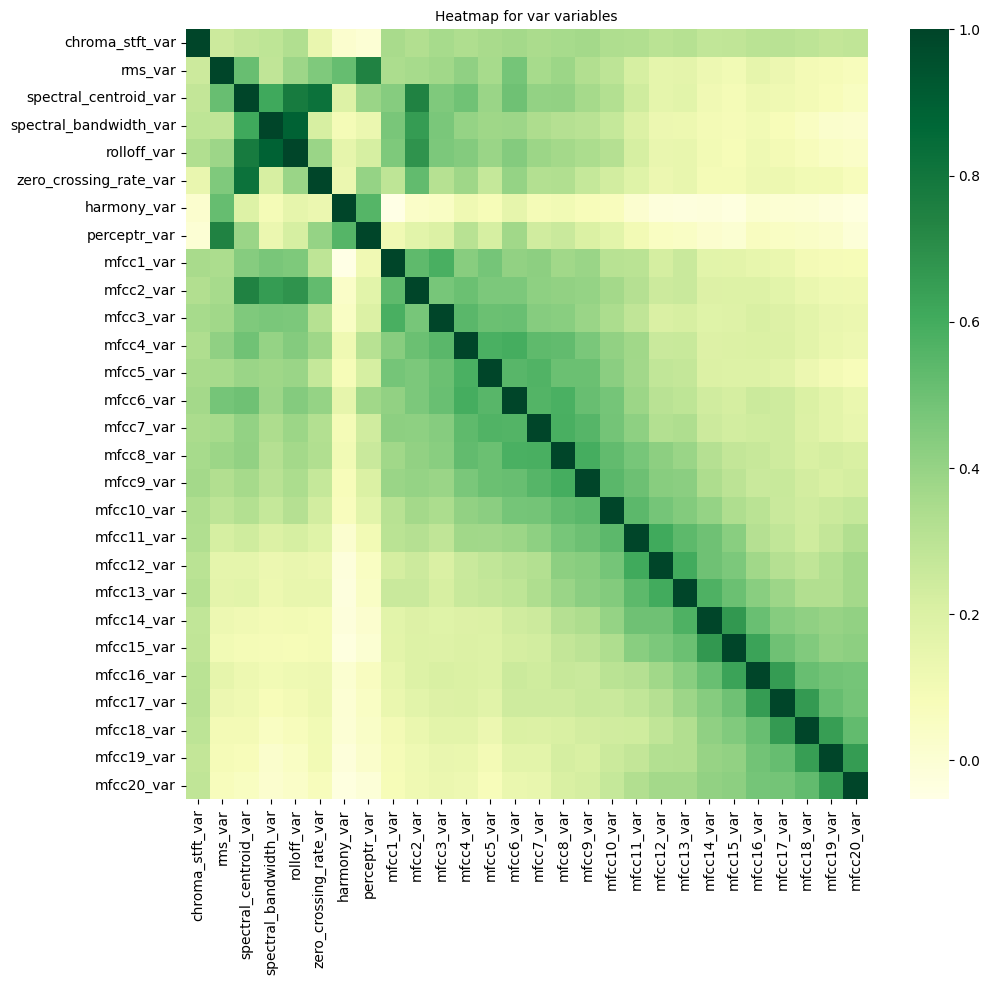

In [19]:



# Computing the Correlation Matrix
spike_cols = [col for col in music_data.columns if 'var' in col]
spike_cols.append('label')

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 10));

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(music_data[spike_cols].corr(), cmap='YlGn')

plt.title('Heatmap for var variables', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

In [37]:

X = music_data.drop(['filename','label'], axis=1)

y = music_data['label']

In [34]:

cols = X.columns

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()


np_scaled=scaler.fit_transform(X)

#normalized_df = pd.DataFrame(normalized_data, columns=data.columns)
# minmax = preprocessing.MinMaxScaler()
# np_scaled = minmax.fit_transform(X)

# new data frame with the new scaled data.
X = pd.DataFrame(np_scaled, columns = cols)

In [35]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6743, 58), (2248, 58), (6743,), (2248,))

In [36]:
%pip install catboost
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import catboost as cb
from xgboost import XGBClassifier

rf = RandomForestClassifier(n_estimators=1500, max_depth=10, random_state=0)
cbc = cb.CatBoostClassifier(verbose=0, eval_metric='Accuracy', loss_function='MultiClass')
xgb = XGBClassifier(n_estimators=1500, learning_rate=0.03)

for clf in (rf, cbc, xgb):
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test, preds))

RandomForestClassifier 0.8020462633451957
CatBoostClassifier 0.8981316725978647
XGBClassifier 0.8945729537366548
